<a href="https://colab.research.google.com/github/whs1111/bert-version/blob/master/src/CLASS/Bert-whs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
cd gdrive/My Drive/Colab_Notebooks/code


/content/gdrive/My Drive/Colab_Notebooks/code


In [4]:
#@title
!git clone https://github.com/NVIDIA/apex
%cd apex
!pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./
%cd ..

fatal: destination path 'apex' already exists and is not an empty directory.
/content/gdrive/My Drive/Colab_Notebooks/code/apex
/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-_csbiiur
Created temporary directory: /tmp/pip-req-tracker-uzkq062l
Created requirements tracker '/tmp/pip-req-tracker-uzkq062l'
Created temporary directory: /tmp/pip-install-_do6xzr_
Processing /content/gdrive/My Drive/Colab_Notebooks/code/apex
  Created temporary directory: /tmp/pip-req-build-uc2s3747
  Added file:///content/gdrive/My%20Drive/Colab_Notebooks/code/apex to build tracker '/tmp/pip-req-tracker-uzkq062l'
    Running setup.py (path:/tmp/pip-req-build-uc2s3747/setup.py) egg_info for package from file:///content/gdrive/My%20Drive/Colab_Notebooks/code/apex
 

In [3]:
!pip install fast-bert

In [4]:
from fast_bert.data_cls import BertDataBunch
DATA_PATH = 'bert-version/src/DATA/'   
LABEL_PATH = 'bert-version/src/DATA/'  
label_cols = [
        "GoodsServices",
        "SearchAndRescue",
        "InformationWanted",
        "Volunteer",
        "Donations",
        "MovePeople",
        "FirstPartyObservation",
        "ThirdPartyObservation",
        "Weather",
        "FundRaising",
        "EmergingThreats",
        "NewSubEvent",
        "MultimediaShare",
        "ServiceAvailable",
        "Factoid",
        "Official",
        "News",
        "CleanUp",
        "Hashtags",
        "OriginalEvent",
        "ContextualInformation",
        "Advice",
        "Sentiment",
        "Discussion",
        "Irrelevant"]
             
databunch = BertDataBunch(DATA_PATH, LABEL_PATH,
                          tokenizer='bert-base-uncased',
                          train_file='train.csv',
                          val_file='valid.csv',
                          label_file='labels.csv',
                          text_col='text',
                          label_col=label_cols,
                          batch_size_per_gpu=16,
                          max_seq_length=140,
                          multi_gpu=False,
                          multi_label=True,
                          model_type='bert')
from fast_bert.learner_cls import BertLearner
from fast_bert.metrics import accuracy_multilabel
import logging
import torch
logger = logging.getLogger()
device_cuda = torch.device("cuda")
metrics = [{'name': 'accuracy_multilabel', 'function': accuracy_multilabel}]

learner = BertLearner.from_pretrained_model(
						databunch,
						pretrained_path='bert-base-uncased',
						metrics=metrics,
						device=device_cuda,
						logger=logger,
						output_dir='bert-version/src/',
						finetuned_wgts_path=None,
						warmup_steps=500,
						multi_gpu=False,
						is_fp16=True,
						multi_label=True,
						logging_steps=50)

FileNotFoundError: ignored

In [ ]:
torch.cuda.empty_cache()

Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


/usr/local/lib/python3.6/dist-packages/apex/amp/wrap.py:101: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  return orig_fn(arg0, *args, **kwargs)


Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0
Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0
Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 4096.0
Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 2048.0
Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 1024.0
Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 512.0
Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 256.0
Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 128.0
Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 64.0
Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32.0
Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16.0
Gradient overflow.  Skipping step, loss scaler 0 reducing l

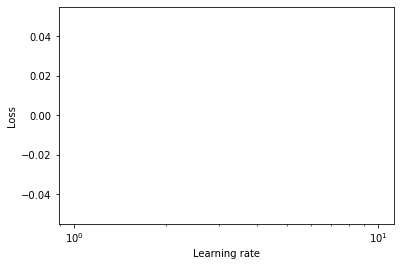

In [8]:
learner.lr_find(start_lr=1e-5,optimizer_type='lamb')

In [1]:

learner.fit(epochs=10,
			lr=1e-5,
			validate=False, 	# Evaluate the model after each epoch
      optimizer_type='lamb',
			schedule_type="warmup_cosine")

NameError: ignored

In [ ]:
learner.save_model()

In [ ]:
import pandas as pd
import numpy as np
from fast_bert.prediction import BertClassificationPredictor
DATA_PATH = '/content/gdrive/My Drive/Colab_Notebooks/code/bert-version/src/DATA/'   
LABEL_PATH = '/content/gdrive/My Drive/Colab_Notebooks/code/bert-version/src/DATA'  
MODEL_PATH = '/content/gdrive/My Drive/Colab_Notebooks/code/bert-version/src/model_out'

predictor = BertClassificationPredictor(
				model_path=MODEL_PATH,
				label_path=LABEL_PATH, # location for labels.csv file
				multi_label=False,
				model_type='bert',
				do_lower_case=True)


file = '/content/gdrive/My Drive/Colab_Notebooks/code/bert-version/src/DATA/test.csv'
combi = pd.read_csv(file)
lens = len(combi['text'])
labels = []

for i in range(lens):
     label = []
     single_prediction = predictor.predict(combi['text'][i])
     for j in range(len(single_prediction)):     
        if single_prediction[j][1]>0.4:
          label.append(single_prediction[j][0])
          break
     labels.append(label)
numpy_array = np.array(labels)
np.save('important.npy',numpy_array )

In [ ]:
import pandas as pd
import numpy as np
from fast_bert.prediction import BertClassificationPredictor
DATA_PATH = '/content/gdrive/My Drive/Colab_Notebooks/code/bert-version/src/DATA/'   
LABEL_PATH = '/content/gdrive/My Drive/Colab_Notebooks/code/bert-version/src/DATA'  
MODEL_PATH = '/content/gdrive/My Drive/Colab_Notebooks/code/bert-version/src/model_out'

predictor = BertClassificationPredictor(
				model_path=MODEL_PATH,
				label_path=LABEL_PATH, # location for labels.csv file
				multi_label=False,
				model_type='bert',
				do_lower_case=True)
trans = {
        "GoodsServices":22,
        "SearchAndRescue":24,
        "InformationWanted":23,
        "Volunteer":2,
        "Donations":0,
        "MovePeople":1,
        "FirstPartyObservation":12,
        "ThirdPartyObservation":20,
        "Weather":21,
        "FundRaising":14,
        "EmergingThreats":10,
        "NewSubEvent":17,
        "MultimediaShare":15,
        "ServiceAvailable":19,
        "Factoid":11,
        "Official":18,
        "News":16,
        "CleanUp":9,
        "Hashtags":13,
        "OriginalEvent":7,
        "ContextualInformation":4,
        "Advice":3,
        "Sentiment":8,
        "Discussion":5,
        "Irrelevant":6}
Label = {
        "GoodsServices": 10,
        "SearchAndRescue": 10,
        "InformationWanted": 10,
        "Volunteer": 8,
        "FundRaising": 5,
        "Donations": 8,
        "MovePeople": 9,
        "FirstPartyObservation": 4,
        "ThirdPartyObservation": 4,
        "Weather": 3.5,
        "EmergingThreats": 8,
        "NewSubEvent": 3.5,
        "MultimediaShare": 2,
        "ServiceAvailable": 5,
        "Factoid": 3,
        "Official": 5,
        "CleanUp": 3,
        "Hashtags": 1,
        "ContextualInformation": 1,
        "News": 4,
        "Advice": 4,
        "Sentiment": 1,
        "Discussion": 1,
        "Irrelevant": 0.5,
        "OriginalEvent": 3
}

file = '/content/gdrive/My Drive/Colab_Notebooks/code/bert-version/src/DATA/test.csv'
combi = pd.read_csv(file)
lens = len(combi['text'])
labels = []

for i in range(lens):
     label = [0，0，0，0，0，0，0，0，0，0，0，0，0，0，0，0，0，0，0，0，0，0，0，0，0,0]
     score = 0
     single_prediction = predictor.predict(combi['text'][i])
     for j in range(len(single_prediction)):     
        label[trans[single_prediction[j][0]] =round(single_prediction[j][1],1)
        score += Label[single_prediction[j][0]]*round(single_prediction[j][1],1)
     label[25] = score
     labels.append(label)
numpy_array = np.array(labels)
np.save('category.npy',numpy_array )

In [ ]:
pwd

'/content/gdrive/My Drive/Colab_Notebooks/code'

In [ ]:
import numpy as np
a= np.load('/content/gdrive/My Drive/Colab_Notebooks/code/important.npy')
b = np.load('/content/gdrive/My Drive/Colab_Notebooks/code/catagory.npy')
print(len(a))
print(len(b))



In [ ]:
import numpy as np
a= np.load('/content/gdrive/My Drive/Colab_Notebooks/code/important.npy')
b = np.load('/content/gdrive/My Drive/Colab_Notebooks/code/catagory.npy')
print(len(a))
print(len(b))


In [ ]:
#@title
!git clone https://github.com/NVIDIA/apex
%cd apex
!pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./
%cd ..

import torch
import apex
from fastai.text import *
import datetime
run_start_time = datetime.datetime.today().strftime('%Y-%m-%d_%H-%M-%S')

LOG_PATH=Path('logs/')  
MODEL_PATH=Path('models/') 

if not LOG_PATH.exists():
  LOG_PATH.mkdir()
import logging

args = {
    "run_text": "my_test",
    "max_seq_length": 30,
    "do_lower_case": True,
    "train_batch_size": 16,
    "learning_rate": 6e-5,
    "num_train_epochs": 12.0,
    "warmup_proportion": 0.002,
    "local_rank": -1,
    "gradient_accumulation_steps": 1,
    "fp16": True,
    "loss_scale": 128
}

logfile = str(LOG_PATH/'log-{}-{}.txt'.format(run_start_time, args["run_text"]))

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(name)s -   %(message)s',
    datefmt='%m/%d/%Y %H:%M:%S',
    handlers=[
        logging.FileHandler(logfile),
        logging.StreamHandler(sys.stdout)
    ])

logger = logging.getLogger()

device = torch.device('cuda')

if torch.cuda.device_count() > 1:
    multi_gpu = True
else:
    multi_gpu = False

In [ ]:
!pip install fast-bert==0.1.4

In [ ]:
from fast_bert.data import *
from fast_bert.learner import *
from fast_bert.metrics import *
from pytorch_pretrained_bert.tokenization import BertTokenizer

In [ ]:
DATA_PATH = Path('bert-version/src/DATA/')     
LABEL_PATH = Path('bert-version/src/DATA/')  

BERT_PRETRAINED_MODEL = "bert-base-uncased"

args["do_lower_case"] = True
args["train_batch_size"] = 16
args["learning_rate"] = 6e-5
args["max_seq_length"] = 140
args["fp16"] = True
tokenizer = BertTokenizer.from_pretrained(BERT_PRETRAINED_MODEL, 
                                          do_lower_case=args['do_lower_case'])
label_cols = ["Low",
             "Medium",
             "High",
             "Critical"]
databunch = BertDataBunch(DATA_PATH, LABEL_PATH, tokenizer, train_file='train.csv', val_file='valid.csv',
                          test_data='test.csv', label_file="labels.csv",
                          text_col="text", label_col=label_cols,
                          bs=args['train_batch_size'], maxlen=args['max_seq_length'], 
                          multi_gpu=multi_gpu, multi_label=True)
metrics = [{'name': 'accuracy', 'function': accuracy_multilabel}]
logger.info(args)
learner = BertLearner.from_pretrained_model(databunch, BERT_PRETRAINED_MODEL, metrics, device, logger, 
                                            is_fp16=args['fp16'], loss_scale=args['loss_scale'], 
                                            multi_gpu=multi_gpu,  multi_label=True)
learner.fit(8, lr=args['learning_rate'], schedule_type="warmup_linear")

In [ ]:
learner.save_and_reload('/content/gdrive/My Drive/Colab_Notebooks/code/bert-version/src/DATA/', "bert-model")
from fast_bert.prediction import BertClassificationPredictor
import numpy as np 

predictor = BertClassificationPredictor(model_path='bert-version/src/DATA/bert-model.bin', pretrained_path="bert-base-uncased", 
                                        label_path='/content/gdrive/My Drive/Colab_Notebooks/code/bert-version/src/DATA/', multi_label=True)

# texts = []
file = '/content/gdrive/My Drive/Colab_Notebooks/code/bert-version/src/DATA/test.csv'
combi = pd.read_csv(file)
lens = len(combi['text'])
labels = []
for i in range(lens):
#     texts.append(combi['text'][i])
    label = []
    single_prediction = predictor.predict(combi['text'][i])
    for j in range(len(single_prediction)):
      if single_prediction[j][1]>0.3:
        label.append(single_prediction[0])
    labels.append(label)
numpy_array = np.array(labels)
np.save('category.npy',numpy_array )
label_cols = ["GoodsServices",
        "SearchAndRescue",
        "InformationWanted",
        "Volunteer",
        "FundRaising",
        "Donations",
        "MovePeople",
        "FirstPartyObservation",
        "ThirdPartyObservation",
        "Weather",
        "EmergingThreats",
        "NewSubEvent",
        "MultimediaShare",
        "ServiceAvailable",
        "Factoid",
        "Official",
        "CleanUp",
        "Hashtags",
        "ContextualInformation",
        "News",
        "Advice",
        "Sentiment",
        "Discussion",
        "Irrelevant",
        "OriginalEvent"]
        
# print(single_prediction)

# Batch predictions
# texts = [
#   "this is the first text",
#   "this is the second text"
# ]

# multiple_predictions = predictor.predict(texts)
